In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.python.keras.utils import np_utils
import tensorflow

In [16]:
X=pd.read_csv("fashion-mnist.csv")
X.head(n=10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [17]:
print(type(X))
X=np.array(X)
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [18]:
Y=X[:,0]
print(Y)

[0 1 2 ... 8 8 1]


In [19]:
X=X[:,1:]

In [20]:
print(X.shape)
print(Y.shape)
print(Y)

(10000, 784)
(10000,)
[0 1 2 ... 8 8 1]


In [21]:
X_train=X.reshape((-1,28,28,1))

In [22]:
Y_train=np_utils.to_categorical(Y)

In [23]:
print(Y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [24]:
print(X_train.shape)
print(Y_train.shape)

(10000, 28, 28, 1)
(10000, 10)


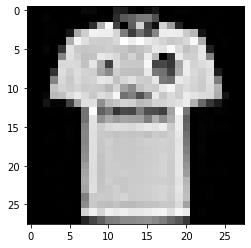

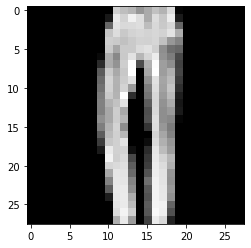

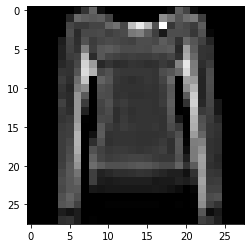

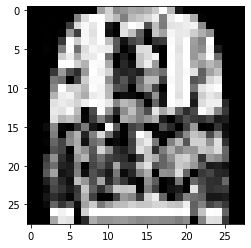

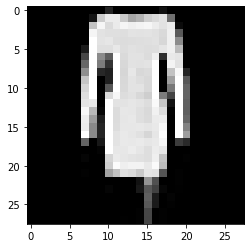

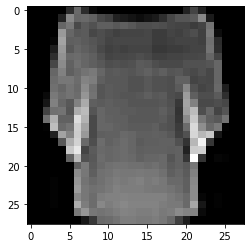

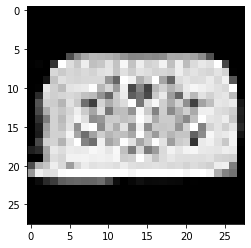

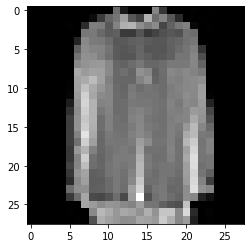

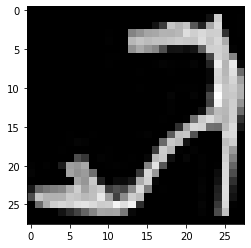

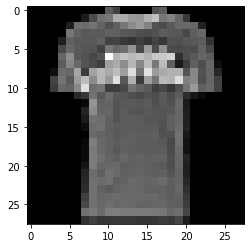

In [25]:
for i in range(10):
    plt.imshow(X_train[i],cmap="gray")
    plt.show()

In [26]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [27]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
hist=model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/20
32/32 [==============================] - 28s 770ms/step - loss: 7.5802 - accuracy: 0.1029 - val_loss: 2.2876 - val_accuracy: 0.0905
Epoch 2/20
32/32 [==============================] - 24s 741ms/step - loss: 2.2595 - accuracy: 0.1292 - val_loss: 2.1285 - val_accuracy: 0.1705
Epoch 3/20
32/32 [==============================] - 24s 737ms/step - loss: 2.1658 - accuracy: 0.1735 - val_loss: 2.1646 - val_accuracy: 0.1485
Epoch 4/20
32/32 [==============================] - 24s 738ms/step - loss: 2.1823 - accuracy: 0.1689 - val_loss: 2.2706 - val_accuracy: 0.0980
Epoch 5/20
32/32 [==============================] - 24s 742ms/step - loss: 2.2442 - accuracy: 0.1367 - val_loss: 2.1386 - val_accuracy: 0.1540
Epoch 6/20
32/32 [==============================] - 24s 737ms/step - loss: 2.1348 - accuracy: 0.1813 - val_loss: 2.0630 - val_accuracy: 0.1950
Epoch 7/20
32/32 [==============================] - 24s 736ms/step - loss: 2.0431 - accuracy: 0.2368 - val_loss: 1.9065 - val_accuracy: 0.2670

In [28]:
hist.history

{'loss': [3.713963270187378,
  2.229050397872925,
  2.1671016216278076,
  2.1923320293426514,
  2.2033984661102295,
  2.1260623931884766,
  2.004446506500244,
  1.9082118272781372,
  1.8217933177947998,
  1.7111518383026123,
  1.6415061950683594,
  1.583862543106079,
  1.5596040487289429,
  1.5275124311447144,
  1.465181589126587,
  1.2299323081970215,
  1.1294238567352295,
  1.0171310901641846,
  0.9452228546142578,
  0.8792397379875183],
 'accuracy': [0.10862500220537186,
  0.148499995470047,
  0.17612500488758087,
  0.16337500512599945,
  0.15600000321865082,
  0.18649999797344208,
  0.24962499737739563,
  0.28975000977516174,
  0.3241249918937683,
  0.3618749976158142,
  0.3815000057220459,
  0.39912500977516174,
  0.40687501430511475,
  0.4176250100135803,
  0.4402500092983246,
  0.4986250102519989,
  0.5953750014305115,
  0.6656249761581421,
  0.6875,
  0.706250011920929],
 'val_loss': [2.287588119506836,
  2.1285390853881836,
  2.1646299362182617,
  2.2705771923065186,
  2.13855

In [30]:
pred=model.predict(X_train)

In [31]:
pred[0]

array([7.36280382e-01, 2.10944545e-02, 1.33617170e-04, 5.96982334e-03,
       5.44941518e-03, 1.17642216e-04, 2.23131046e-01, 3.80881550e-03,
       3.62155749e-03, 3.93263152e-04], dtype=float32)

In [32]:
Y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

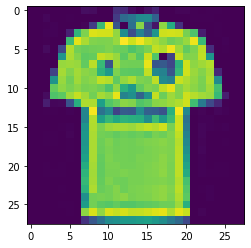

In [33]:
plt.imshow((X_train[0]))

In [39]:
np.argmax(pred[0])

0

In [40]:
np.argmax(pred[10])

3

In [41]:
Y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
model.evaluate(X_train,Y_train)

313/313 [==============================] - 6s 19ms/step - loss: 0.8609 - accuracy: 0.7109


[0.8609085083007812, 0.7109000086784363]

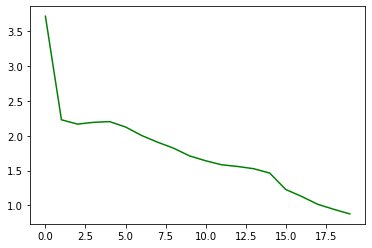

In [43]:
plt.plot(hist.history['loss'],'g')


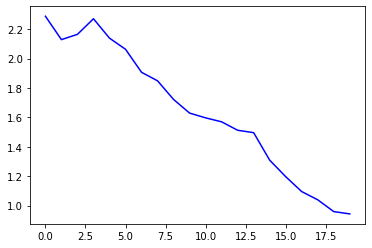

In [44]:
plt.plot(hist.history['val_loss'],'b')

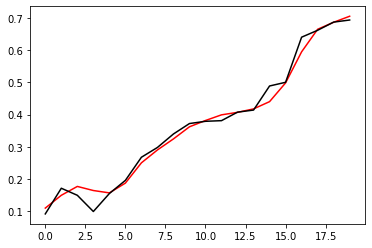

In [46]:
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()